In [48]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("."))

['.ipynb_checkpoints', 'dev_NLI_B.tsv', 'Model Evaluation.ipynb', 'test_ep_1.txt', 'test_ep_2.txt', 'test_ep_3.txt', 'test_ep_4.txt']


In [90]:
test_orig = pd.read_csv('dev_NLI_B.tsv', sep='\t')
test_orig.head()

,id,sentence1,polarity,context,target,aspect,label
0,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,general,1
1,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,general,1
2,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,general,0
3,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,general,0
4,1262,Tienda de Autoservicio. Siempre bien,Negative,Tienda de Autoservicio,general,general,0


In [91]:
from glob import glob

test_models = [pd.read_csv(f, sep=' ', header=None, usecols=[0]) for f in glob('test_ep_*.txt')]
for i, t in enumerate(test_models):
    t.columns = ['label_pred_{0}'.format(i)]
    
test_model = pd.concat(test_models, axis = 1)
test_model.head()

,label_pred_0,label_pred_1,label_pred_2,label_pred_3
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [92]:
test = pd.concat([test_model, test_orig], axis = 1)
test.head()

,label_pred_0,label_pred_1,label_pred_2,label_pred_3,id,sentence1,polarity,context,target,aspect,label
0,1,1,1,1,1262,Tienda de Autoservicio. Siempre bien,Positive,Tienda de Autoservicio,general,general,1
1,1,1,1,1,1262,Tienda de Autoservicio. Siempre bien.,Positive,Tienda de Autoservicio,general,general,1
2,0,0,0,0,1262,Tienda de Autoservicio. Siempre bien,None,Tienda de Autoservicio,general,general,0
3,0,0,0,0,1262,Tienda de Autoservicio. Siempre bien.,None,Tienda de Autoservicio,general,general,0
4,0,0,0,0,1262,Tienda de Autoservicio. Siempre bien,Negative,Tienda de Autoservicio,general,general,0


In [93]:
test['y_real'] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

In [103]:
for k in test.keys():
    if 'label_pred_' in k:
        test['y_' + k] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test[k] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test[k] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test[k] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test[k] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test[k] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test[k] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test[k] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test[k] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style='darkgrid')

def plot_confusion_matrix(y_true, y_pred, classes, title="", cmap=plt.cm.Blues, clean=False, figsize=(20, 16), dpi=300):
    
    cm = confusion_matrix(y_true, y_pred)    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    if clean:
        # indexes of No's '0'  and  None's '-'
        indexes = [i for i, c in enumerate(classes) if c.endswith('0') or  '-' in c]
        
        cm = np.delete(cm, indexes, axis=0)
        cm = np.delete(cm, indexes, axis=1)
        
        cm_norm = np.delete(cm_norm, indexes, axis=0)
        cm_norm = np.delete(cm_norm, indexes, axis=1)
        
        classes = np.delete(classes, indexes, axis=0)
        
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label',
           title="Precisión promedio = {0:.2f} %".format(np.mean(cm.diagonal())) if clean else title)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    fmt_norm = '.2f'
    
    thresh = 50
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if cm[i, j] == 0:
                continue
            ax.text(j, i, '\n' + format(cm[i, j], fmt), fontsize=8,
                    ha="center",  va="top",
                    color="white" if cm_norm[i, j] > thresh else "black")
            
            if not math.isnan(cm_norm[i, j]):
                ax.text(j, i, format(cm_norm[i, j], fmt_norm) + '%', fontsize=8,
                        ha="center",  va="bottom",
                        color="white" if cm_norm[i, j] > thresh else "black")
        
    
    fig.tight_layout()
    return ax

In [107]:
y_real = test['y_real'].values
y_preds = {}

for k in test.keys():
    if 'y_label_pred_' in k:
        y_preds[k] = test[k].values

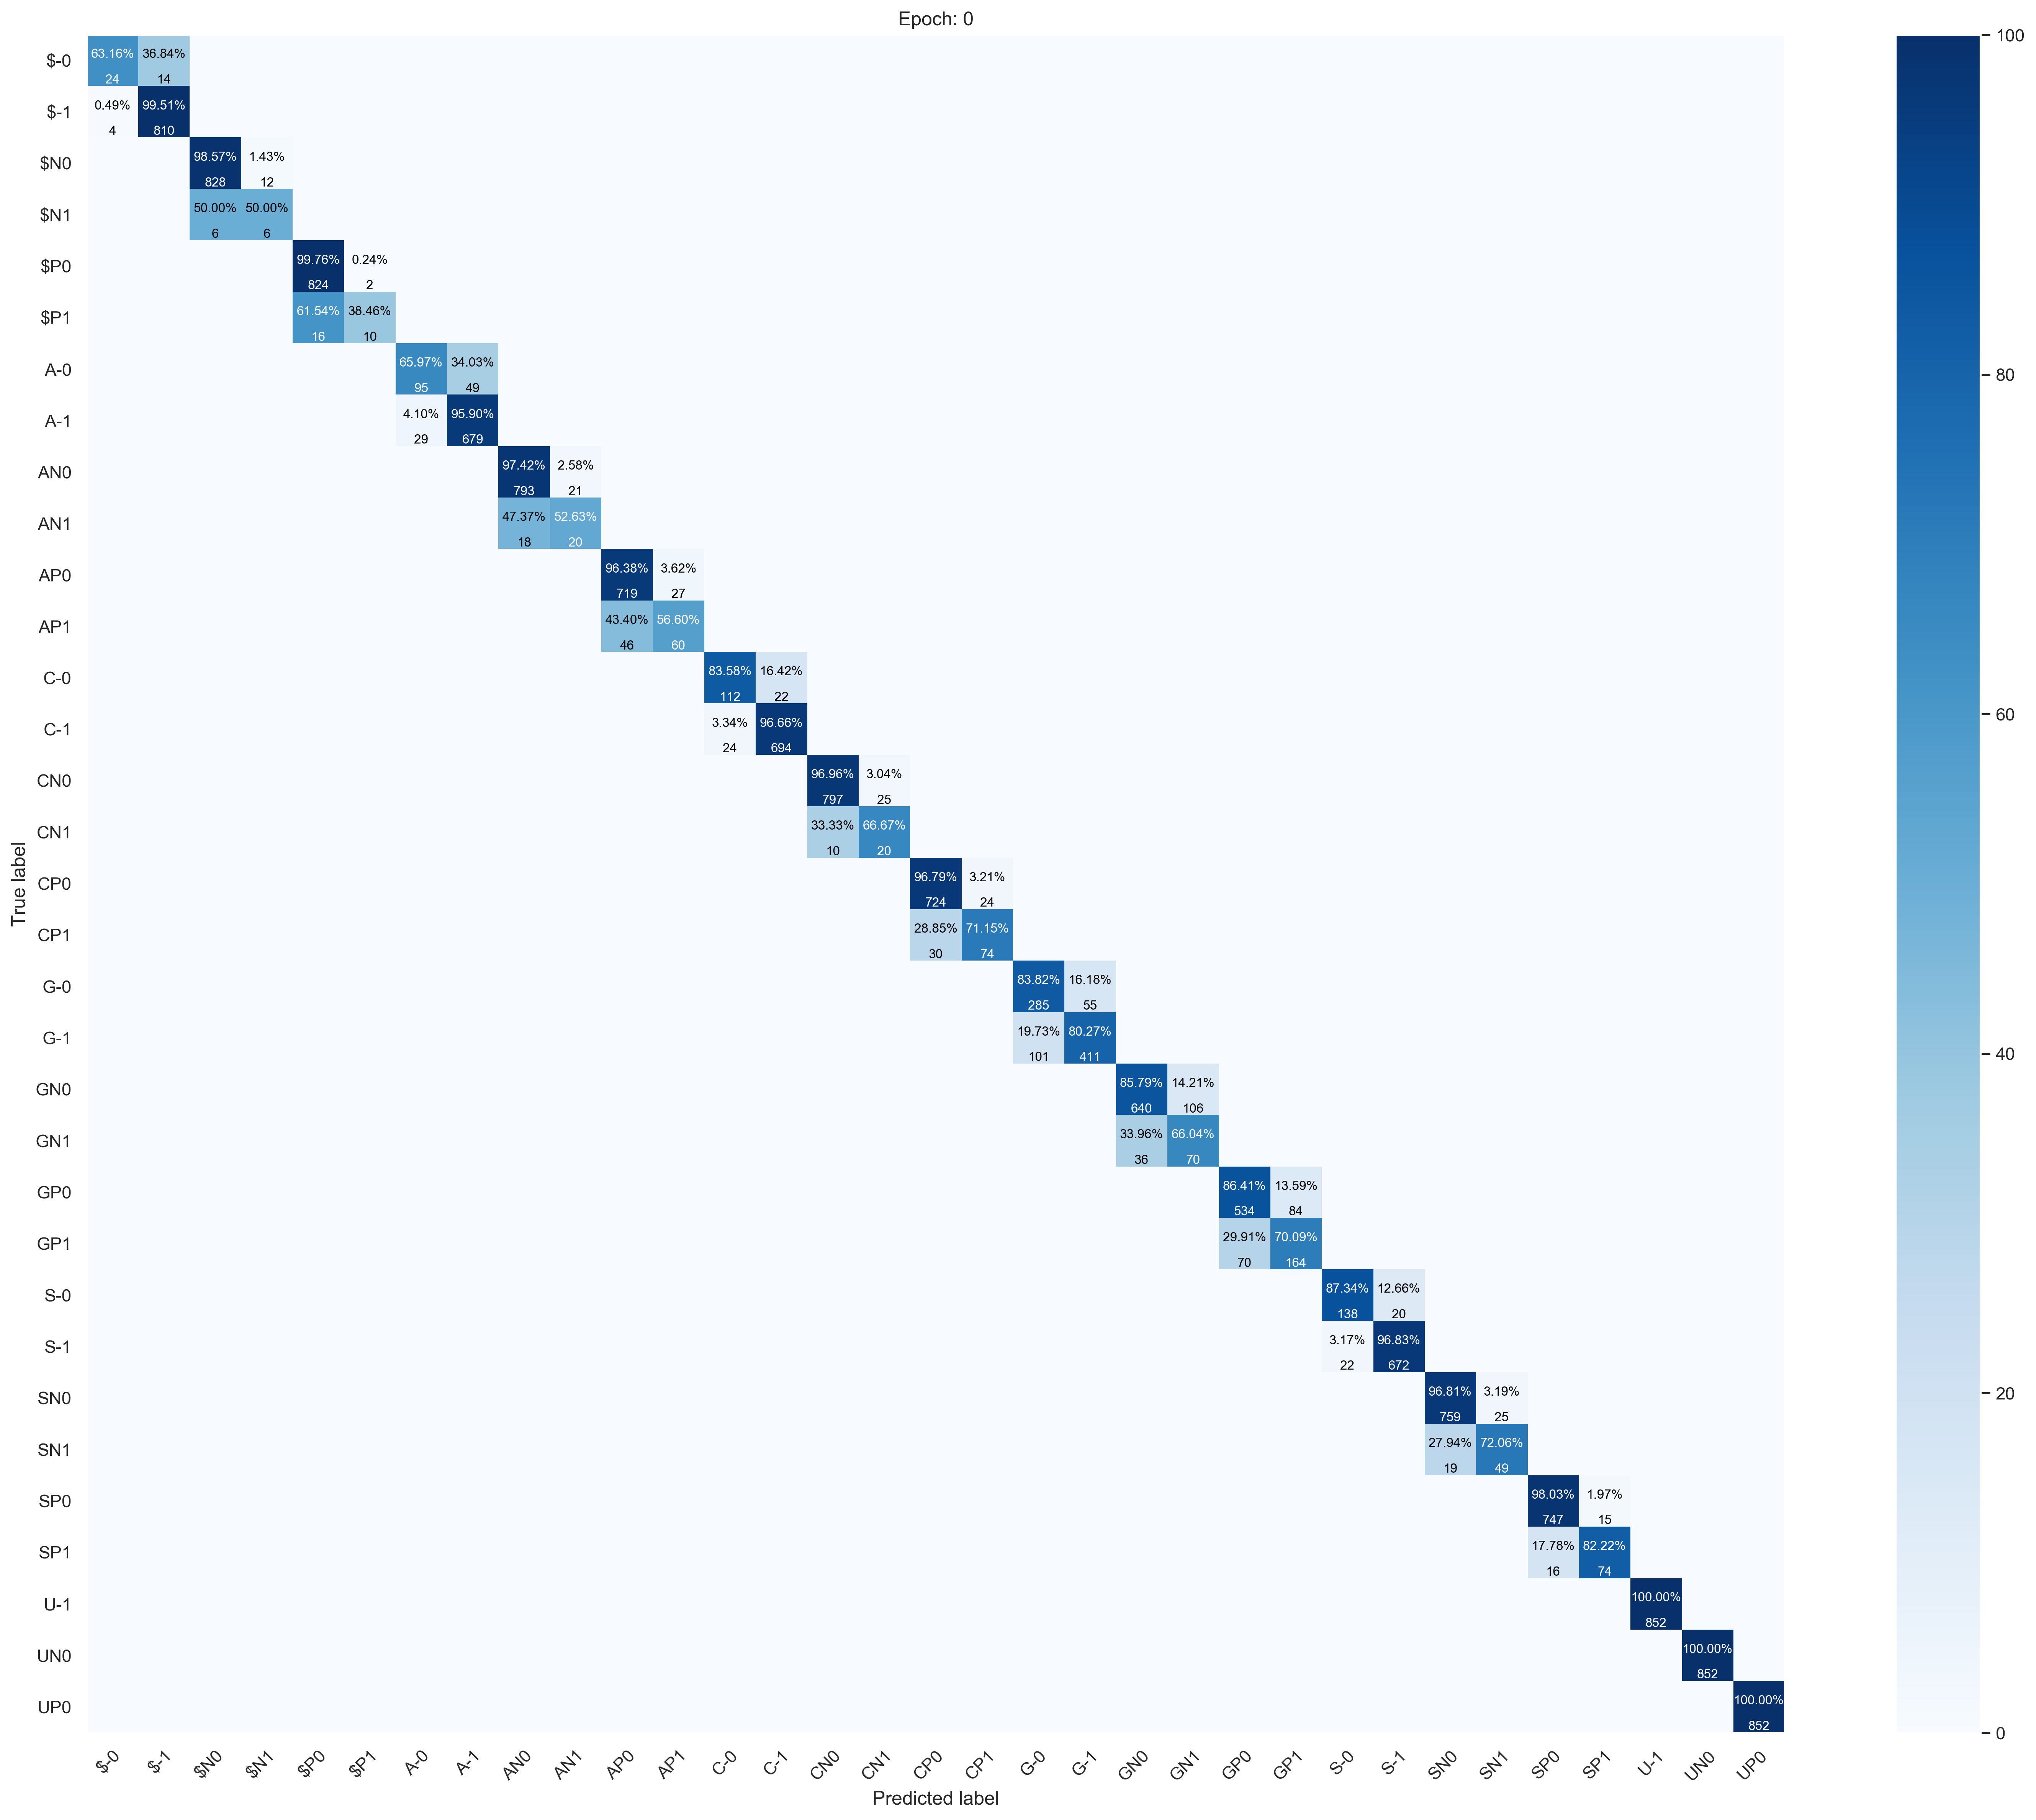

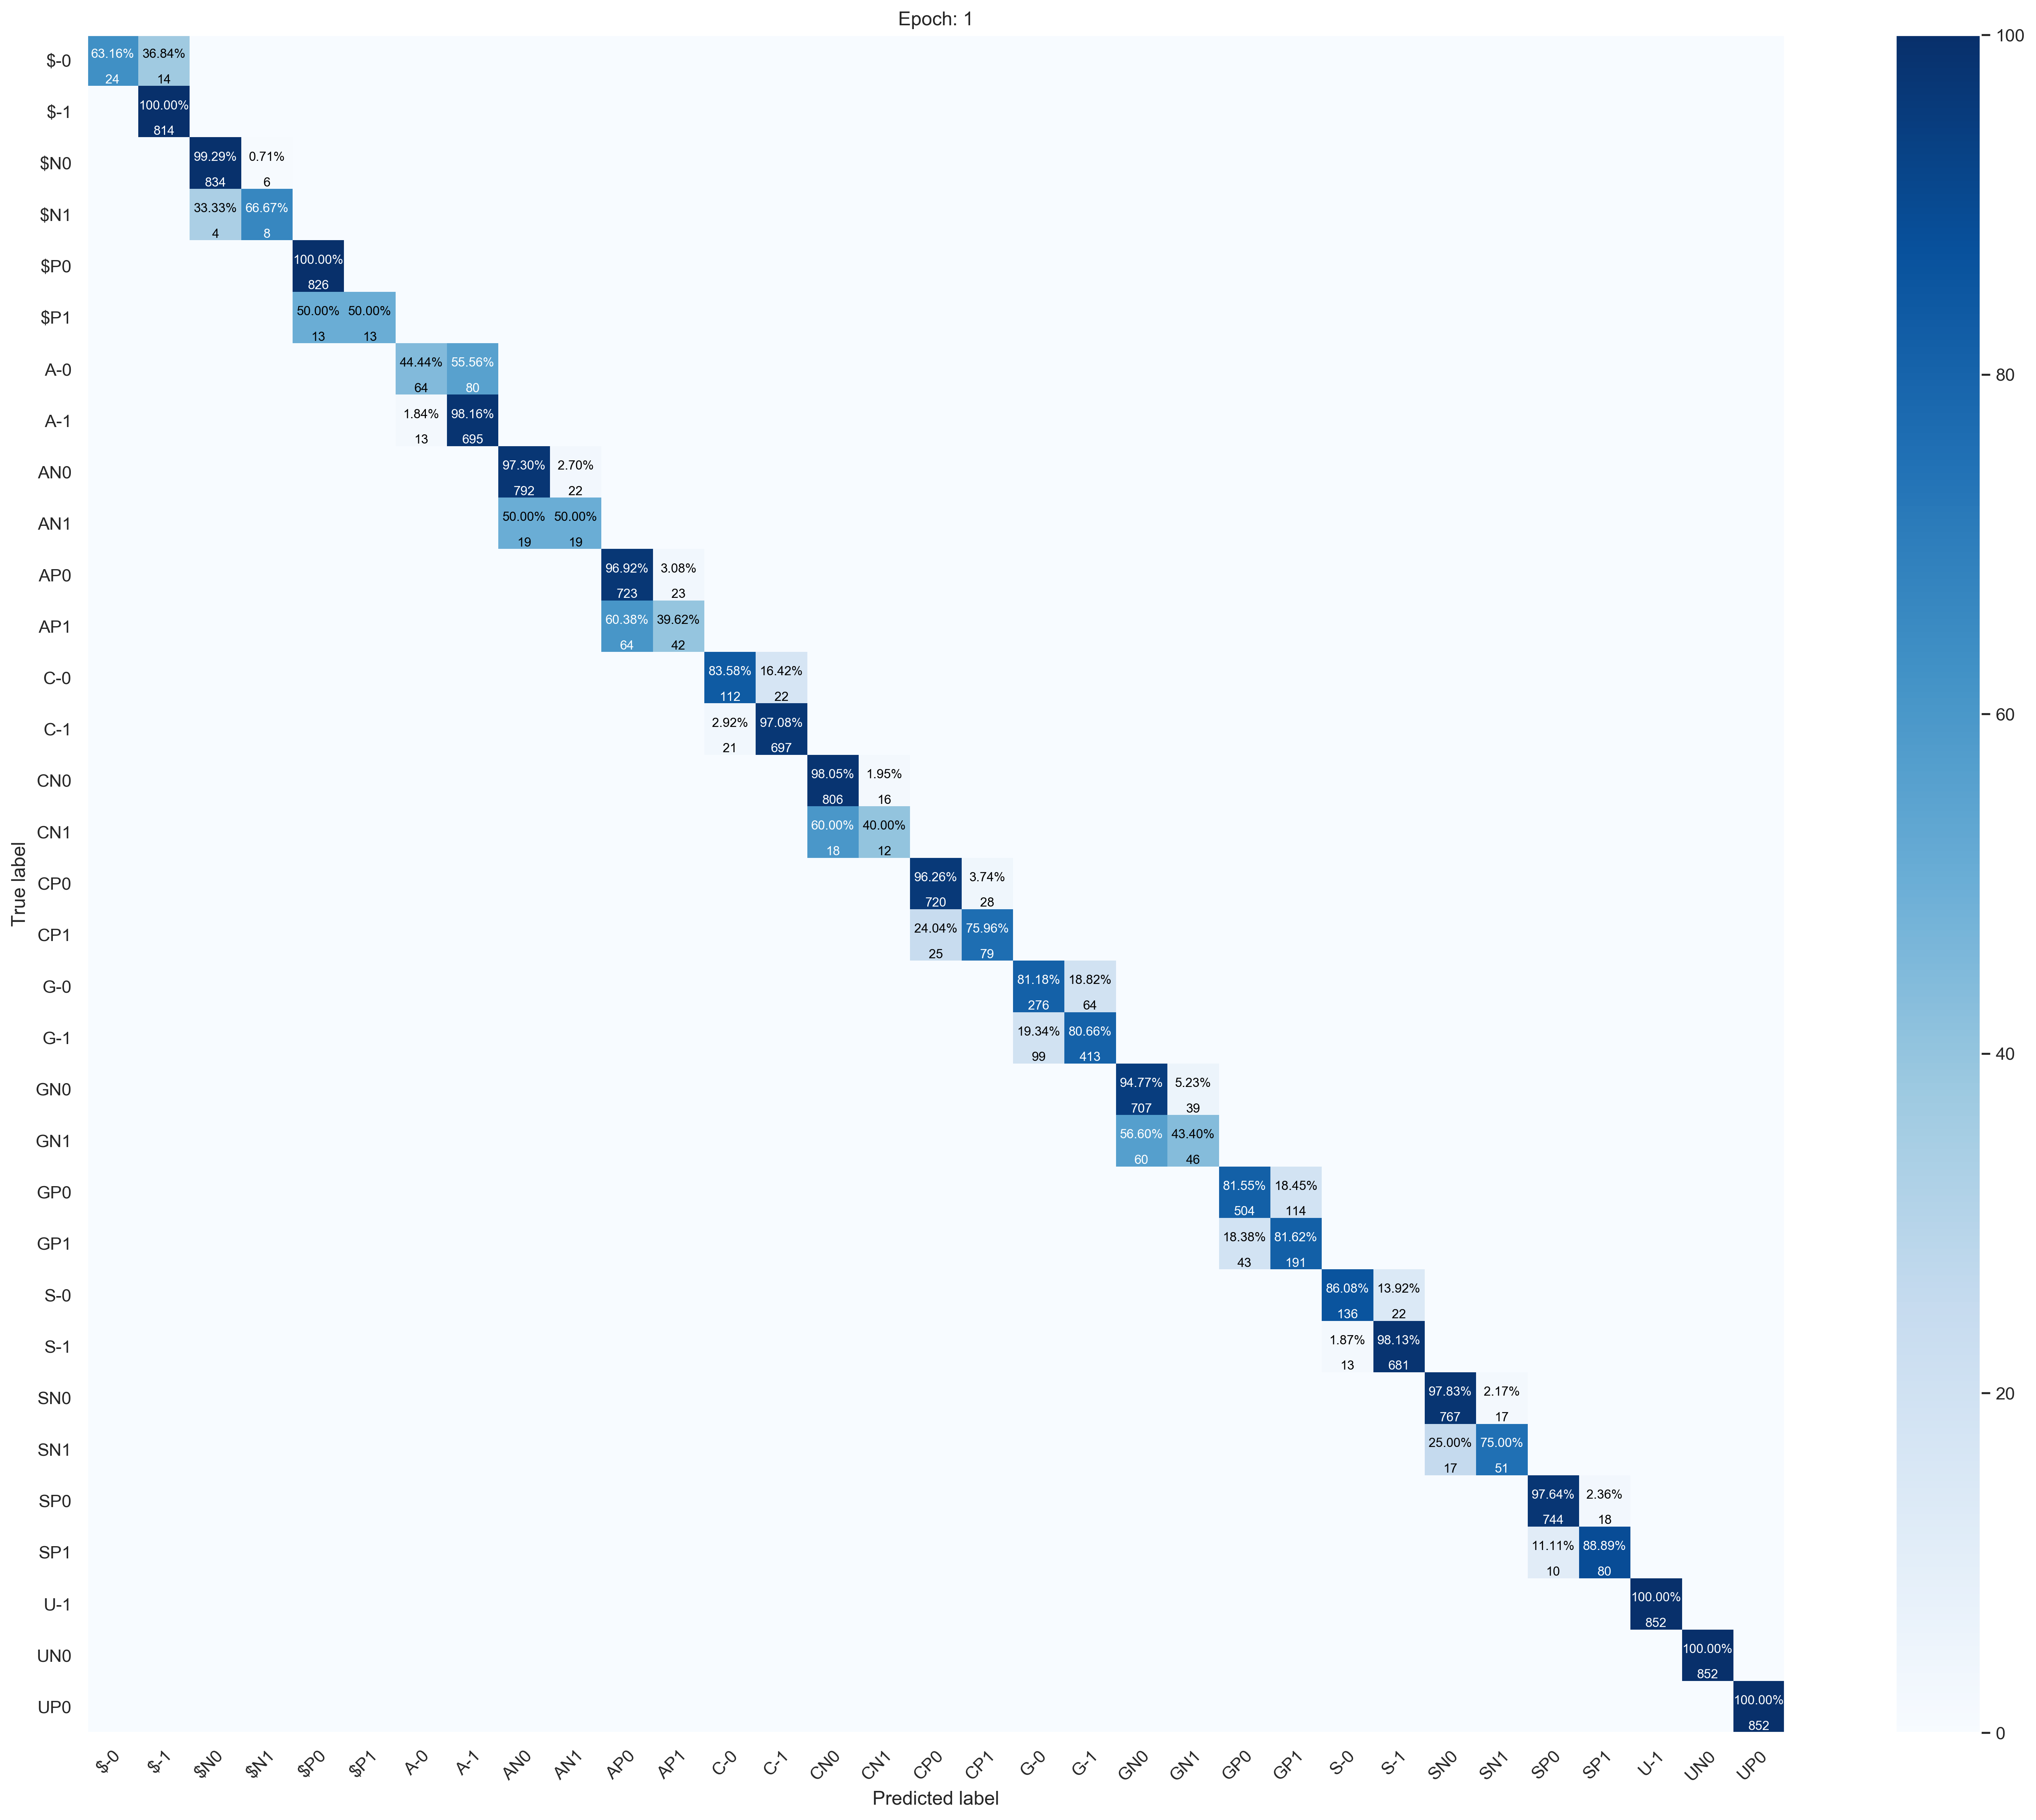

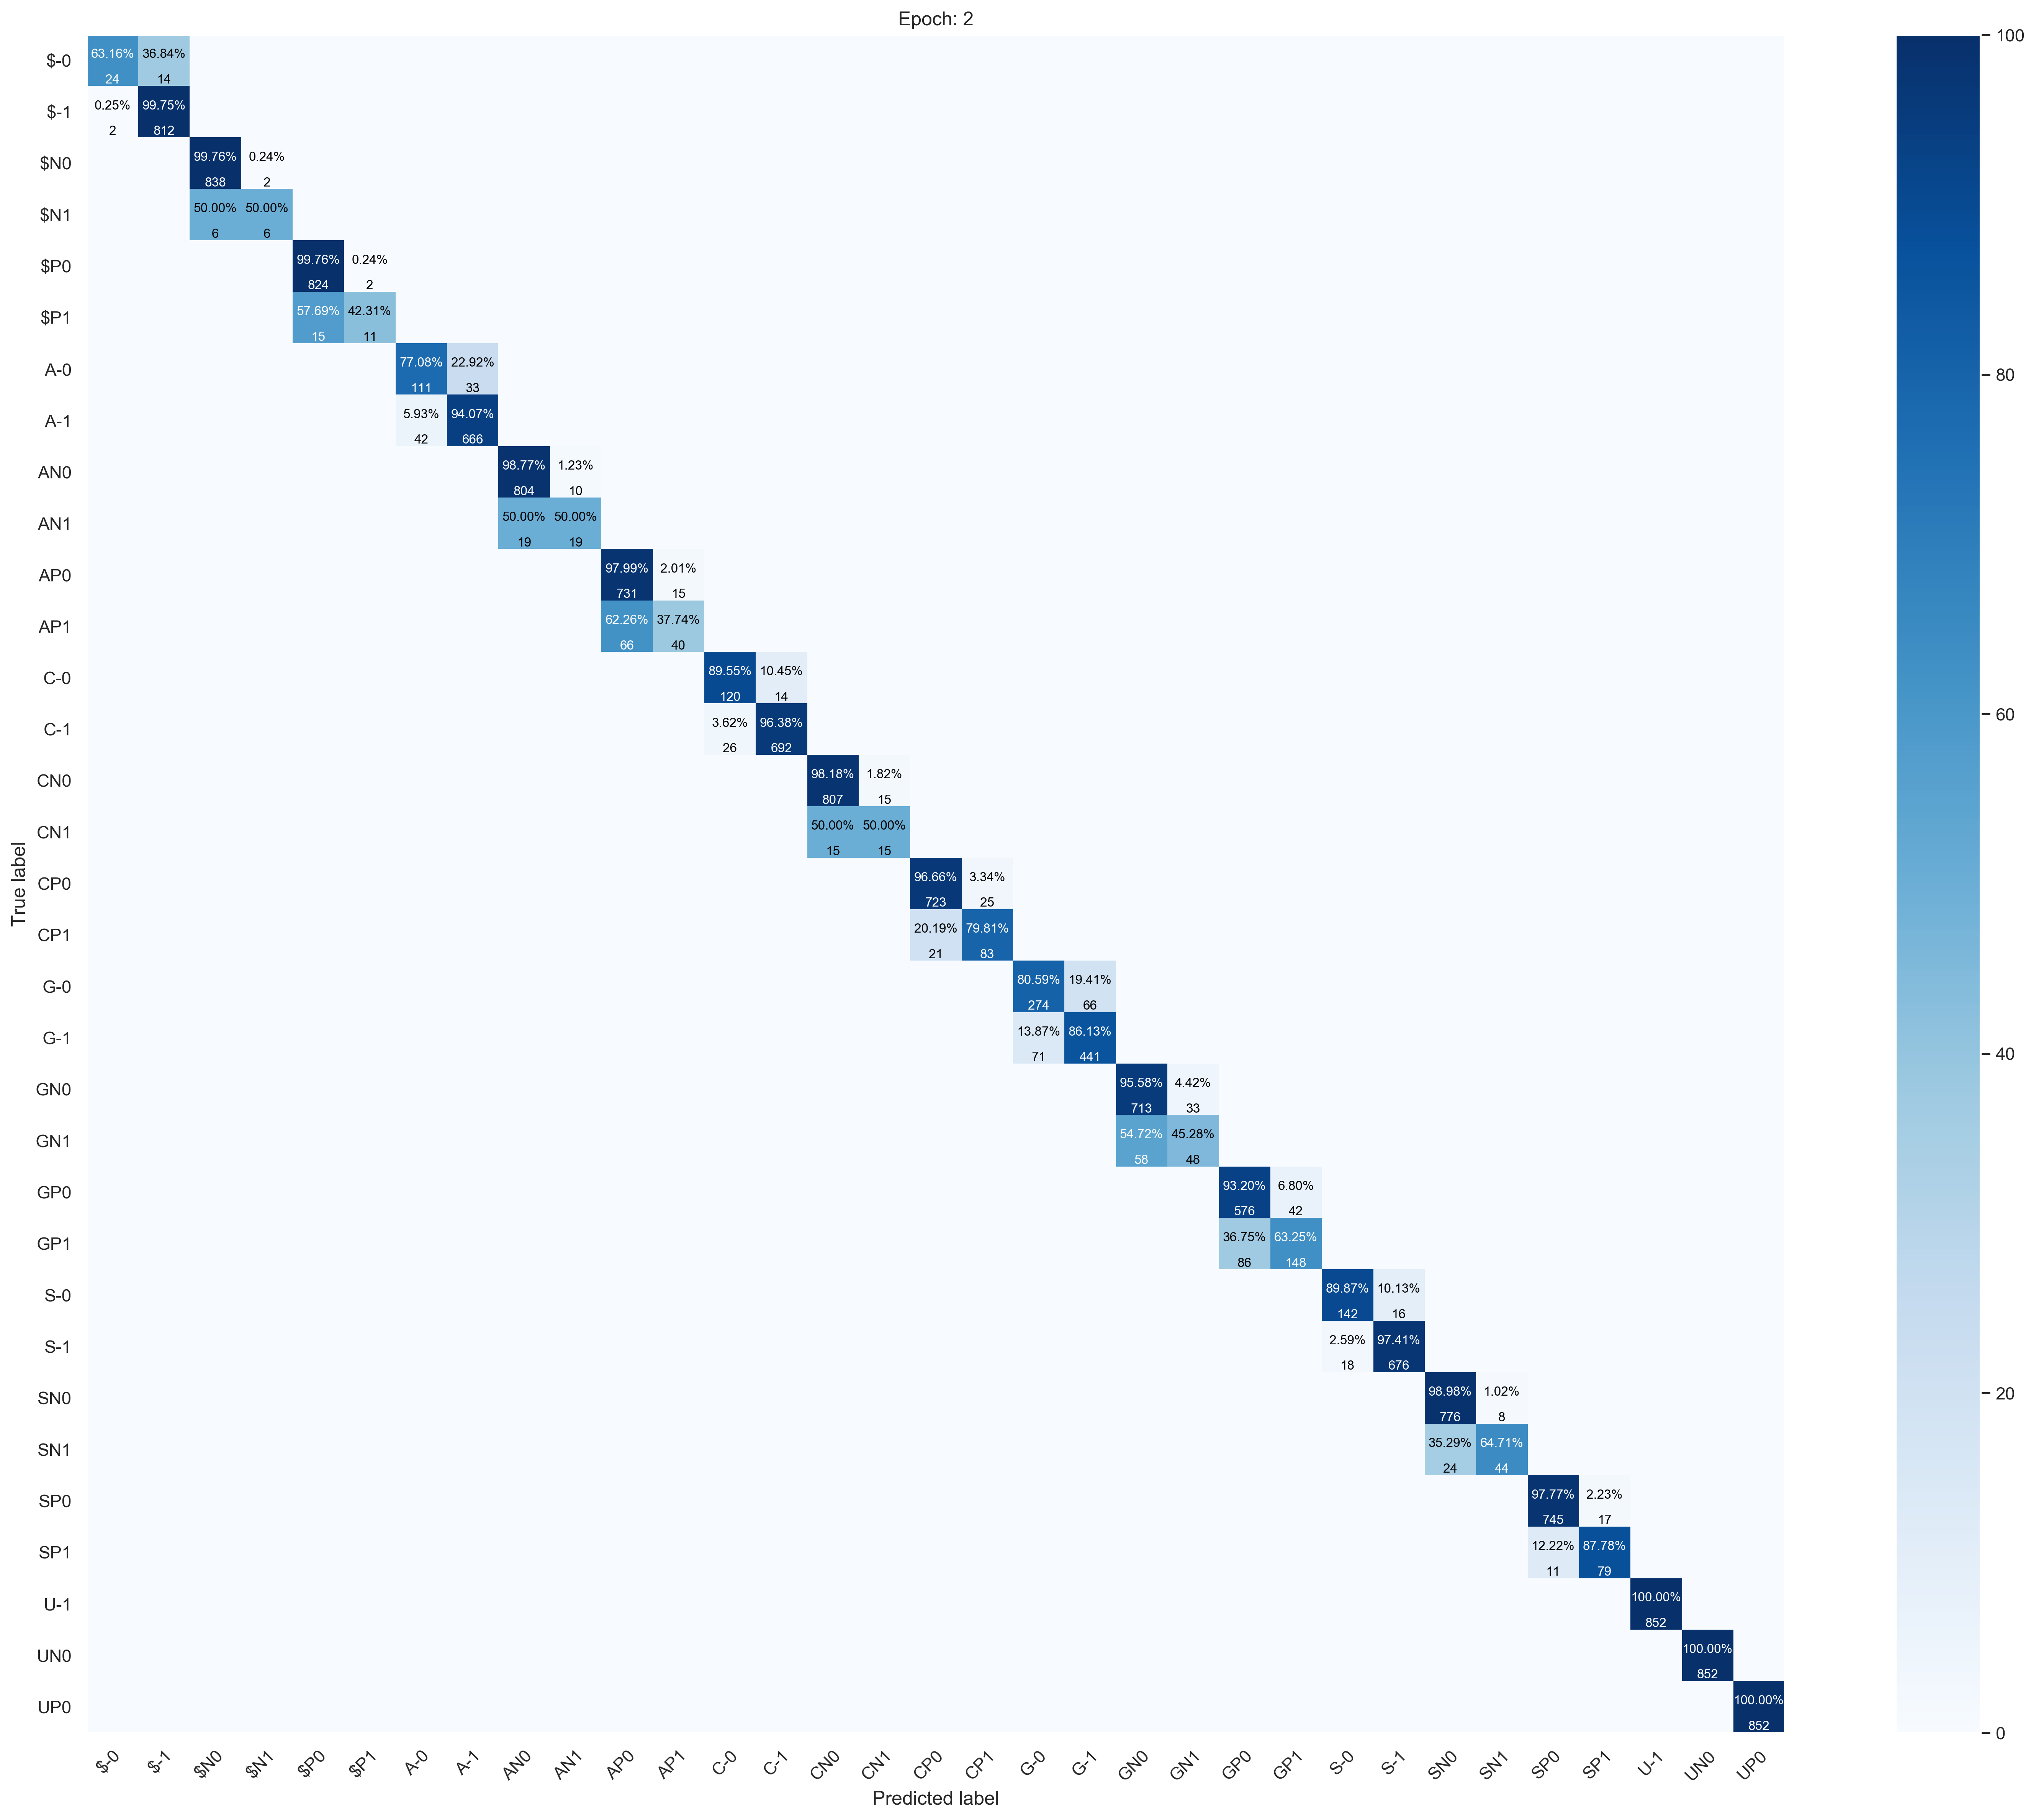

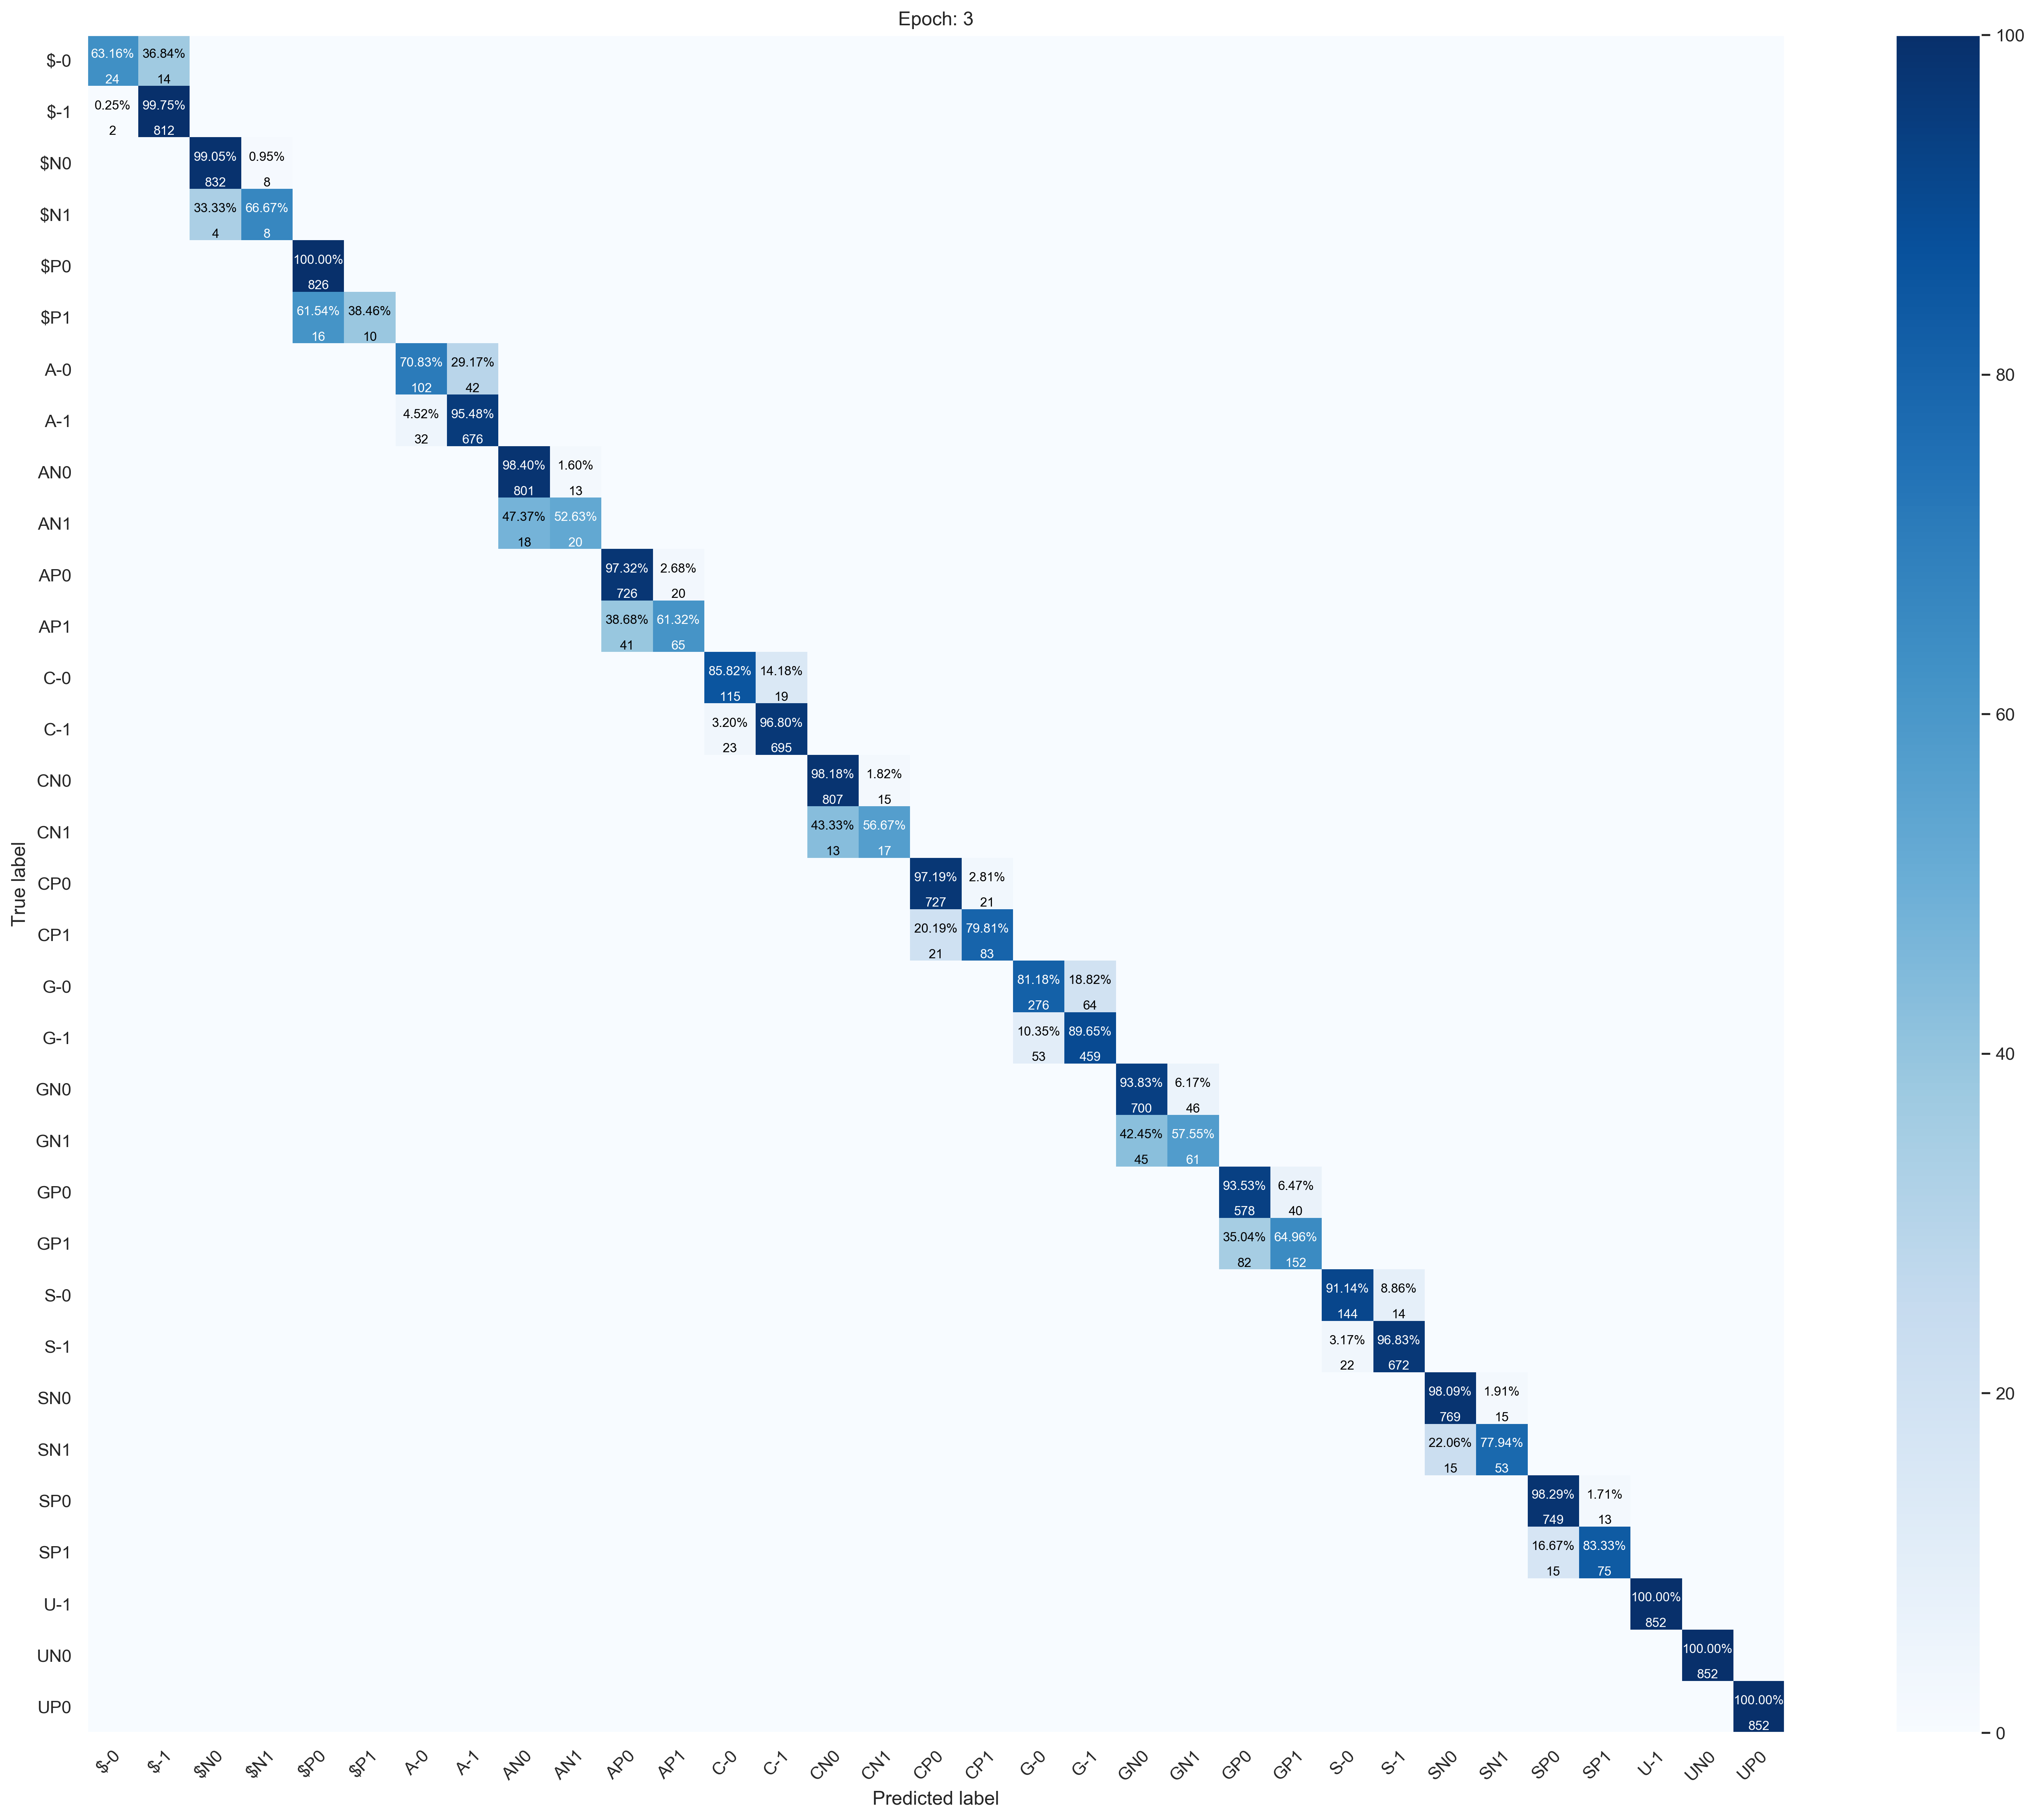

In [126]:
for k in test.keys():
    if 'y_label_pred_' in k:
        y_pred = y_preds[k]
        k = k.replace('y_label_pred_', '')
        plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_pred), title="Epoch: {0}".format(k))

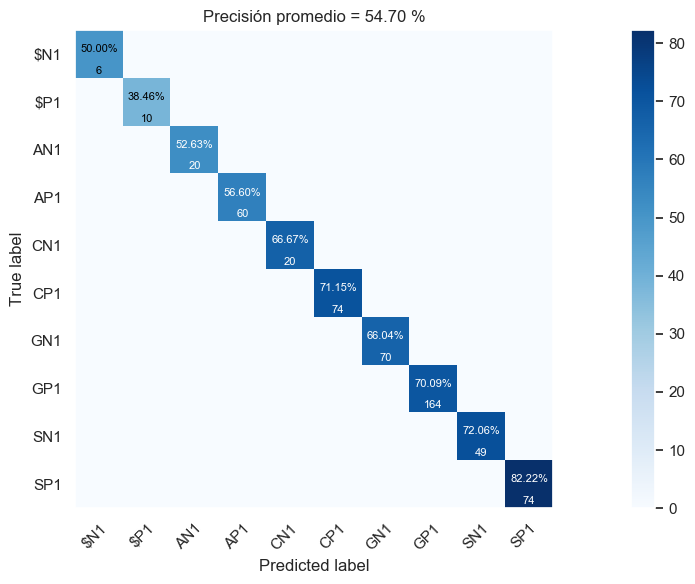

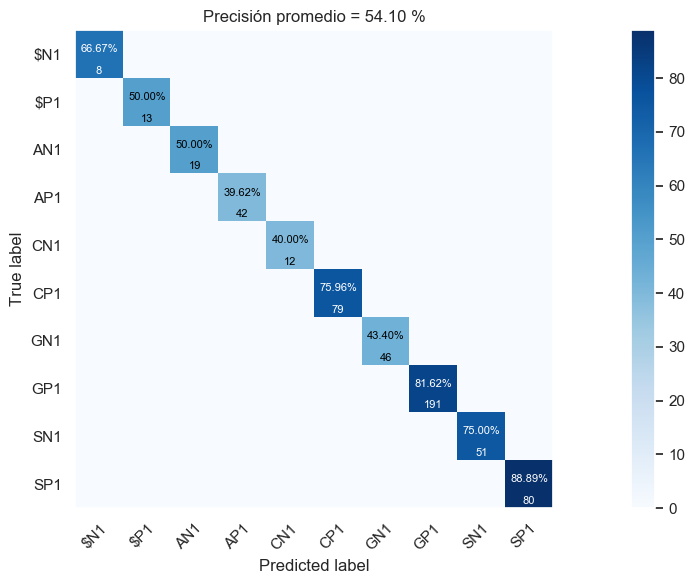

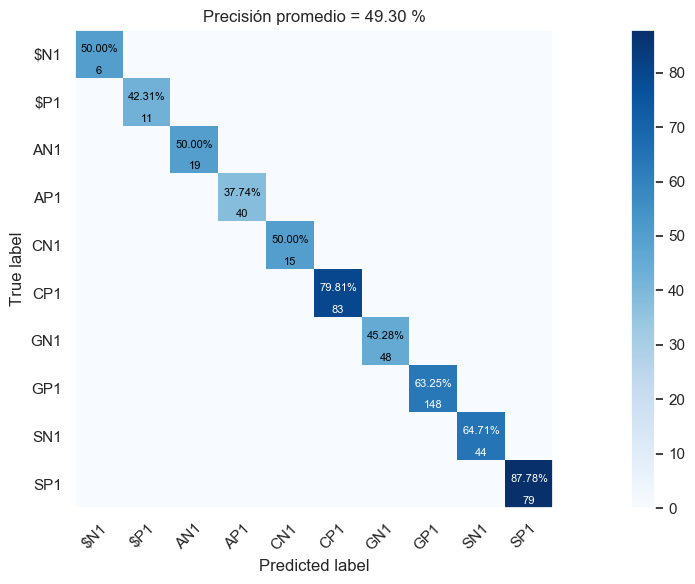

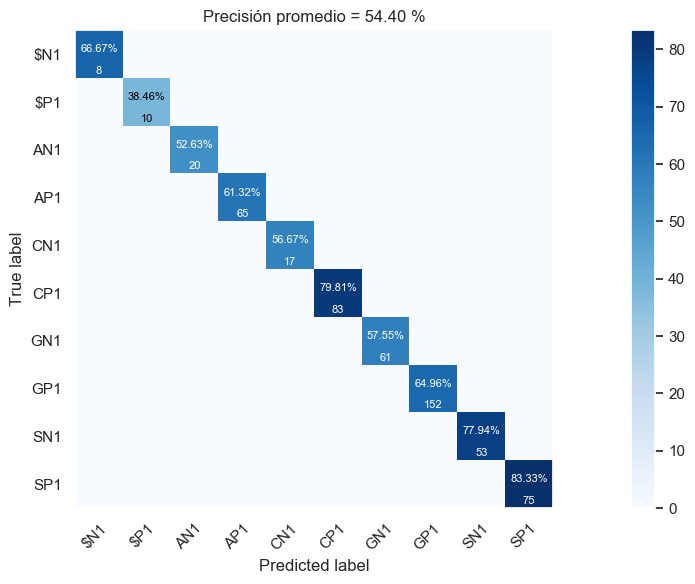

In [127]:
for k in test.keys():
    if 'y_label_pred_' in k:
        y_pred = y_preds[k]
        k = k.replace('y_label_pred_', '')
        plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_pred), clean=True, figsize=(16, 6), dpi=100)

In [416]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [417]:
import pandas as pd

from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.transform import transform

cm = confusion_matrix(y_real, y_pred)    
cm = pd.DataFrame(cm)

cm.index.name = 'classA'
cm.columns.name = 'classB'

cm.index = cm.index.astype(str)

In [418]:
for k in cm.keys():
    cm[k] = cm[k].astype(str)

In [425]:
df = pd.DataFrame(cm.stack(), columns=['rate']).reset_index()
#df['classA'] = df['classA'].astype(str)
df['classB'] = df['classB'].astype(str)
df['rate'] = df['classB'].astype(float)

# df["classA"] = list(map(str, df["classA"]))
# df["classB"] = list(map(str, df["classB"]))
    
df.head()

,classA,classB,rate
0,0,0,0.0
1,0,1,1.0
2,0,2,2.0
3,0,3,3.0
4,0,4,4.0


In [426]:
df.dtypes

classA     object
classB     object
rate      float64
dtype: object

In [427]:
source = ColumnDataSource(df)

In [432]:
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())

p = figure(plot_width=800, plot_height=300, title="Confusion Matrix",
           x_range=list(cm.index), y_range=list(reversed(cm.index)),
           #toolbar_location=None, tools="", 
           x_axis_location="below"
           )

p.rect(x="index", y="classes", width=1, height=1, source=source,
       line_color=None, fill_color=transform('rate', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "classes" (closest match: "classB") [renderer: GlyphRenderer(id='2378', ...)]


In [174]:
import pandas as pd

from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data
from bokeh.transform import transform

data.Year = data.Year.astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

source = ColumnDataSource(df)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())

p = figure(plot_width=800, plot_height=300, title="US Unemployment 1948—2016",
           x_range=list(data.index), y_range=list(reversed(data.columns)),
           #toolbar_location=None, tools="", 
           x_axis_location="above")

p.rect(x="Year", y="Month", width=1, height=1, source=source,
       line_color=None, fill_color=transform('rate', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)

In [253]:
from bokeh.sampledata.unemployment1948 import data
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1948,4.0,4.7,4.5,4.0,3.4,3.9,3.9,3.6,3.4,2.9,3.3,3.6,3.8
1,1949,5.0,5.8,5.6,5.4,5.7,6.4,7.0,6.3,5.9,6.1,5.7,6.0,5.9
2,1950,7.6,7.9,7.1,6.0,5.3,5.6,5.3,4.1,4.0,3.3,3.8,3.9,5.3
3,1951,4.4,4.2,3.8,3.2,2.9,3.4,3.3,2.9,3.0,2.8,3.2,2.9,3.3
4,1952,3.7,3.8,3.3,3.0,2.9,3.2,3.3,3.1,2.7,2.4,2.5,2.5,3.0


In [254]:
data.Year = data.Year.astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'
data.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,4.0,4.7,4.5,4.0,3.4,3.9,3.9,3.6,3.4,2.9,3.3,3.6
1949,5.0,5.8,5.6,5.4,5.7,6.4,7.0,6.3,5.9,6.1,5.7,6.0
1950,7.6,7.9,7.1,6.0,5.3,5.6,5.3,4.1,4.0,3.3,3.8,3.9
1951,4.4,4.2,3.8,3.2,2.9,3.4,3.3,2.9,3.0,2.8,3.2,2.9
1952,3.7,3.8,3.3,3.0,2.9,3.2,3.3,3.1,2.7,2.4,2.5,2.5


In [255]:
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

In [256]:
df.dtypes

Year      object
Month     object
rate     float64
dtype: object